In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [2]:
wine=datasets.load_wine()

In [7]:
df=pd.DataFrame(wine.data,columns=wine.feature_names)

In [8]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [9]:
df["target"]=wine.target

In [10]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [11]:
df.shape

(178, 14)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [14]:
x=df
y=df.pop("target")

In [15]:
x.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [17]:
y.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn=KNeighborsClassifier(n_neighbors=11)

In [42]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [43]:
pred=knn.predict(x_test)

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [45]:
confusion_matrix(y_test,pred)

array([[14,  0,  0],
       [ 0,  9,  5],
       [ 3,  1,  4]], dtype=int64)

In [50]:
print(accuracy_score(y_test,pred))
import matplotlib.pyplot as plt
%matplotlib notebook

0.75


<IPython.core.display.Javascript object>


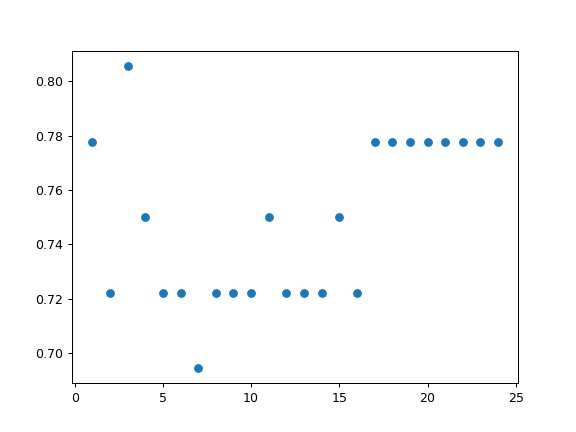

In [57]:
krange=range(1,25)
scores=[]
for k in krange:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    scores.append(accuracy_score(y_test,pred))
    
plt.scatter(krange,scores)

In [53]:
scores

[0.7777777777777778,
 0.7222222222222222,
 0.8055555555555556,
 0.75,
 0.7222222222222222,
 0.7222222222222222,
 0.6944444444444444,
 0.7222222222222222,
 0.7222222222222222,
 0.7222222222222222,
 0.75,
 0.7222222222222222,
 0.7222222222222222,
 0.7222222222222222,
 0.75,
 0.7222222222222222,
 0.7777777777777778,
 0.7777777777777778,
 0.7777777777777778,
 0.7777777777777778,
 0.7777777777777778,
 0.7777777777777778,
 0.7777777777777778,
 0.7777777777777778]

In [58]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
accuracy_score(y_test,pred)

0.8055555555555556

In [59]:
confusion_matrix(y_test,pred)

array([[12,  0,  2],
       [ 1, 11,  2],
       [ 1,  1,  6]], dtype=int64)

<IPython.core.display.Javascript object>


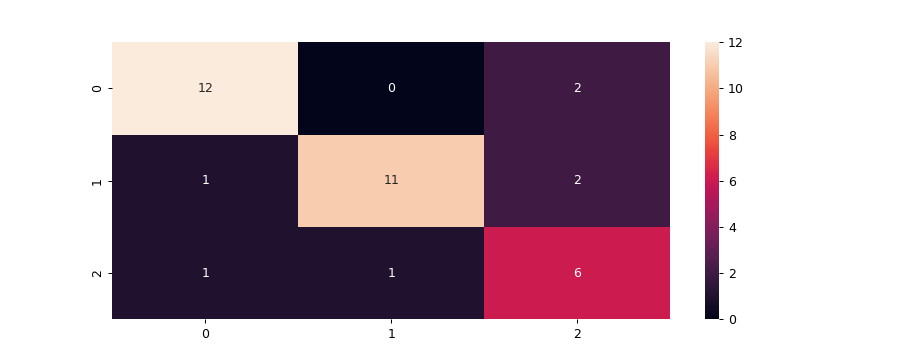

<AxesSubplot:>

In [65]:
import seaborn as sns
plt.figure(figsize=(10,4))
sns.heatmap(confusion_matrix(y_test,pred),annot=True)